In [1]:
# Import packages 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
sns.set()

# Set global options 
pd.options.display.max_rows = 50
pd.options.display.max_columns = 100
plt.style.use("seaborn-whitegrid")
sns.set_color_codes("muted")

In [2]:
df= pd.read_excel('dataset_giaxemaycu.xlsx')

In [3]:
# Xem số dòng, số cột
df.shape

(219, 17)

In [4]:
# Xem một số dòng đầu 
df.head()

,Hãng xe,Trọng lượng,Mã lực,Màu xe,Năm sản xuất,Dòng xe,Loại xe,Tên xe,Giá bán,Năm đăng ký,Tình trạng,Dung Tích,Xuất xứ,Số km đã đi,Chính sách bảo hành,Giấy tờ,Địa chỉ người bán
0,Yamaha,117,15.4,Đỏ,2018,Exciter,Côn tay,Yamaha Exciter 2018,16800000,2018,0.7,150,Việt Nam,30000,Hãng,Chính chủ,Bình Dương
1,Honda,110,11.6,Xanh,2018,Air Blade,Tay ga,Honda Air Blade 2018,26500000,2018,0.6,125,Nhật Bản,7979,Hãng,Chính chủ,Đắk Lắk
2,Yamaha,99,8.8,Đen,2018,Sirius,Xe số,Yamaha Sirius 2018,9800000,2018,0.6,115,Việt Nam,20000,Hãng,Chính chủ,Cần Thơ
3,Yamaha,99,8.1,Xanh,2016,Grande,Tay ga,Yamaha Grande 2016,19500000,2016,0.6,125,Việt Nam,20000,Hãng,Chính chủ,Hà Nội
4,Honda,97,8.8,Trắng,2020,Vision,Tay ga,Honda Vision Smarkey 2020,25500000,2020,0.85,110,Việt Nam,10000,Hãng,Chính chủ,Hà Nội


In [5]:
# Xem một số dòng cuối để chắc rằng dữ liệu là đồng nhấu 
df.tail(4)

,Hãng xe,Trọng lượng,Mã lực,Màu xe,Năm sản xuất,Dòng xe,Loại xe,Tên xe,Giá bán,Năm đăng ký,Tình trạng,Dung Tích,Xuất xứ,Số km đã đi,Chính sách bảo hành,Giấy tờ,Địa chỉ người bán
215,Yamaha,116,15.4,Xám,2022,NVX,Tay ga,Yamaha NVX 155,38800000,2022,0.8,155,Nhật Bản,2300,Hãng,Chính chủ,Hà Nội
216,Honda,130,14.4,Vàng,2015,PCX,Tay ga,Honda PCX 150,21500000,2015,0.6,157,Việt Nam,76000,Hết thời hạn,Chính chủ,Đà Nẵng
217,Honda,96,8.8,Đỏ,2022,Vision,Tay ga,Honda Vision 2022,30500000,2022,0.85,110,Nhật Bản,4000,Hãng,Chính chủ,Đà Nẵng
218,Piaggio,116,11.7,Trắng,2015,Liberty,Tay ga,Piaggio Liberty 2015,5800000,2015,0.8,124.5,Việt Nam,20000,Hết thời hạn,Không chính chủ,Hà Nội


** COMMENT **
- Dataset về xe máy cũ
- Gồm 219 rows và 17 columns
- 

## 1. DATA CLEANING
+ Xác định và xử lý dữ liệu thiếu.
+ Đổi tên các cột để đảm bảo tính nhất quán và dễ đọc.
+ Chuyển đổi dữ liệu thành các định dạng phù hợp (ví dụ: từ object sang numeric).

#### Chuẩn hóa tên cột 
    - Viết thường
    - Thay thế khoảng trắng bằng dấu _

In [7]:
# View column's names
df.columns.to_list()

['Hãng xe',
 'Trọng lượng',
 'Mã lực',
 'Màu xe',
 'Năm sản xuất',
 'Dòng xe',
 'Loại xe',
 'Tên xe',
 'Giá bán',
 'Năm đăng ký',
 'Tình trạng',
 'Dung Tích',
 'Xuất xứ',
 'Số km đã đi',
 'Chính sách bảo hành',
 'Giấy tờ',
 'Địa chỉ người bán']

In [8]:
import re

#Standardize column names 
df.columns = [re.sub("[ -]", "_", c).lower().strip() for c in df.columns]

In [9]:
# Check result
df.head()

,hãng_xe,trọng_lượng,mã_lực,màu_xe,năm_sản_xuất,dòng_xe,loại_xe,tên_xe,giá_bán,năm_đăng_ký,tình_trạng,dung_tích,xuất_xứ,số_km_đã_đi,chính_sách_bảo_hành,giấy_tờ,địa_chỉ_người_bán
0,Yamaha,117,15.4,Đỏ,2018,Exciter,Côn tay,Yamaha Exciter 2018,16800000,2018,0.7,150,Việt Nam,30000,Hãng,Chính chủ,Bình Dương
1,Honda,110,11.6,Xanh,2018,Air Blade,Tay ga,Honda Air Blade 2018,26500000,2018,0.6,125,Nhật Bản,7979,Hãng,Chính chủ,Đắk Lắk
2,Yamaha,99,8.8,Đen,2018,Sirius,Xe số,Yamaha Sirius 2018,9800000,2018,0.6,115,Việt Nam,20000,Hãng,Chính chủ,Cần Thơ
3,Yamaha,99,8.1,Xanh,2016,Grande,Tay ga,Yamaha Grande 2016,19500000,2016,0.6,125,Việt Nam,20000,Hãng,Chính chủ,Hà Nội
4,Honda,97,8.8,Trắng,2020,Vision,Tay ga,Honda Vision Smarkey 2020,25500000,2020,0.85,110,Việt Nam,10000,Hãng,Chính chủ,Hà Nội


In [10]:
# Chuẩn hóa lại cột giá bán để dễ đọc
df['giá_bán'] = df['giá_bán'] / 1000000  # Chia cho 1 000 000 để đổi đơn vị ( ví dụ 16 800 000 thành 16.8)

In [11]:
#Check
df.head()

,hãng_xe,trọng_lượng,mã_lực,màu_xe,năm_sản_xuất,dòng_xe,loại_xe,tên_xe,giá_bán,năm_đăng_ký,tình_trạng,dung_tích,xuất_xứ,số_km_đã_đi,chính_sách_bảo_hành,giấy_tờ,địa_chỉ_người_bán
0,Yamaha,117,15.4,Đỏ,2018,Exciter,Côn tay,Yamaha Exciter 2018,16.8,2018,0.7,150,Việt Nam,30000,Hãng,Chính chủ,Bình Dương
1,Honda,110,11.6,Xanh,2018,Air Blade,Tay ga,Honda Air Blade 2018,26.5,2018,0.6,125,Nhật Bản,7979,Hãng,Chính chủ,Đắk Lắk
2,Yamaha,99,8.8,Đen,2018,Sirius,Xe số,Yamaha Sirius 2018,9.8,2018,0.6,115,Việt Nam,20000,Hãng,Chính chủ,Cần Thơ
3,Yamaha,99,8.1,Xanh,2016,Grande,Tay ga,Yamaha Grande 2016,19.5,2016,0.6,125,Việt Nam,20000,Hãng,Chính chủ,Hà Nội
4,Honda,97,8.8,Trắng,2020,Vision,Tay ga,Honda Vision Smarkey 2020,25.5,2020,0.85,110,Việt Nam,10000,Hãng,Chính chủ,Hà Nội


In [12]:
# Replace '?' thành NaN
df = df.replace('?', np.nan)

In [13]:
# Checking missing data
missing_data = df.isnull().sum()
print(missing_data)

hãng_xe                 0
trọng_lượng             2
mã_lực                  8
màu_xe                  0
năm_sản_xuất            0
dòng_xe                 1
loại_xe                 0
tên_xe                  0
giá_bán                 0
năm_đăng_ký             0
tình_trạng              2
dung_tích               3
xuất_xứ                29
số_km_đã_đi             6
chính_sách_bảo_hành     1
giấy_tờ               6
địa_chỉ_người_bán       0
dtype: int64


In [14]:
# % giá trị bị thiếu
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

hãng_xe                 0.000000
trọng_lượng             0.913242
mã_lực                  3.652968
màu_xe                  0.000000
năm_sản_xuất            0.000000
dòng_xe                 0.456621
loại_xe                 0.000000
tên_xe                  0.000000
giá_bán                 0.000000
năm_đăng_ký             0.000000
tình_trạng              0.913242
dung_tích               1.369863
xuất_xứ                13.242009
số_km_đã_đi             2.739726
chính_sách_bảo_hành     0.456621
giấy_tờ               2.739726
địa_chỉ_người_bán       0.000000
dtype: float64


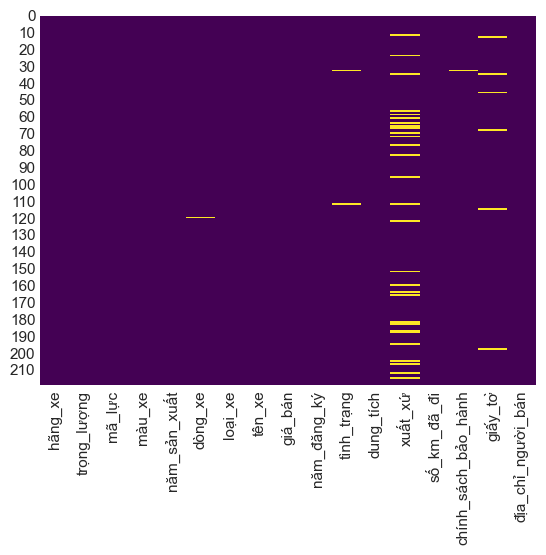

In [21]:
# Trực quan hóa missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# nhận xét : Giá trị missing nằm nhiều nhất ở column 'xuất_xứ' và 'địa_chỉ_người_bán'

In [16]:
# Chuyển đổi thành numeric cho một số cột
df['số_km_đã_đi'] = pd.to_numeric(df['số_km_đã_đi'])
df['dung_tích'] = pd.to_numeric(df['dung_tích'])
df['mã_lực'] = pd.to_numeric(df['mã_lực'])
df['trọng_lượng'] = pd.to_numeric(df['trọng_lượng'])

In [20]:
# Thay thế giá trị thiếu trong bằng giá trị trung bình
df['số_km_đã_đi'].fillna(df['số_km_đã_đi'].mean(), inplace=True)
df['dung_tích'].fillna(df['dung_tích'].mean(), inplace=True)
df['mã_lực'].fillna(df['mã_lực'].mean(), inplace=True)
df['trọng_lượng'].fillna(df['trọng_lượng'].mean(), inplace=True)

In [25]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hãng_xe              219 non-null    object 
 1   trọng_lượng          219 non-null    float64
 2   mã_lực               219 non-null    float64
 3   màu_xe               219 non-null    object 
 4   năm_sản_xuất         219 non-null    int64  
 5   dòng_xe              218 non-null    object 
 6   loại_xe              219 non-null    object 
 7   tên_xe               219 non-null    object 
 8   giá_bán              219 non-null    float64
 9   năm_đăng_ký          219 non-null    int64  
 10  tình_trạng           217 non-null    object 
 11  dung_tích            219 non-null    float64
 12  xuất_xứ              190 non-null    object 
 13  số_km_đã_đi          219 non-null    float64
 14  chính_sách_bảo_hành  218 non-null    object 
 15  giấy_tờ            213 non-null    obj

In [32]:
df.describe()

,trọng_lượng,mã_lực,năm_sản_xuất,giá_bán,năm_đăng_ký,dung_tích,số_km_đã_đi
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,111.832719,11.773365,2017.885845,30.659854,2017.972603,134.704815,14320.600939
std,13.455775,4.022240,4.346329,29.127444,4.356707,35.529994,17832.388825
min,81.000000,2.780000,1987.000000,1.700000,1987.000000,49.950000,1.000000
25%,100.000000,8.895000,2016.000000,14.850000,2016.000000,119.450000,3342.500000
50%,112.000000,11.200000,2019.000000,23.500000,2019.000000,125.000000,10000.000000
75%,117.000000,14.450000,2021.000000,36.000000,2021.000000,150.000000,20000.000000
max,172.000000,38.000000,2023.000000,299.000000,2023.000000,329.600000,200000.000000


# 2. EDA
+ Thống kê mô tả cơ bản (mean, median, ..).
+ Phân tích phân bố của các biến (với histograms, boxplots).
+ Tìm hiểu mối quan hệ giữa các biến (correlation matrix, scatter plots).

### Mean 

In [26]:
mean_gia_ban = df['giá_bán'].mean()
mean_so_km_da_di = df['số_km_đã_đi'].mean()
mean_dung_tich = df['dung_tích'].mean()
mean_ma_luc = df['mã_lực'].mean()
mean_trong_luong = df['trọng_lượng'].mean()

print("Trung bình giá bán:", mean_gia_ban)
print("Trung bình số km đã đi:", mean_so_km_da_di)
print("Trung bình dung tích:", mean_dung_tich)
print("Trung bình mã lực:", mean_ma_luc)
print("Trung bình trọng lượng:", mean_trong_luong)


Trung bình giá bán: 30.65985387671233
Trung bình số km đã đi: 14320.600938967136
Trung bình dung tích: 134.70481481481482
Trung bình mã lực: 11.773364928909952
Trung bình trọng lượng: 111.83271889400922


### Median

In [28]:
median_gia_ban = df['giá_bán'].median()
median_so_km_da_di = df['số_km_đã_đi'].median()
median_dung_tich = df['dung_tích'].median()
median_ma_luc = df['mã_lực'].median()
median_trong_luong = df['trọng_lượng'].median()

print("Trung vị giá bán:", median_gia_ban)
print("Trung vị số km đã đi:", median_so_km_da_di)
print("Trung vị dung tích:", median_dung_tich)
print("Trung vị mã lực:", median_ma_luc)
print("Trung vị trọng lượng:", median_trong_luong)


Trung vị giá bán: 23.5
Trung vị số km đã đi: 10000.0
Trung vị dung tích: 125.0
Trung vị mã lực: 11.2
Trung vị trọng lượng: 112.0


### Mode

In [30]:
mode_gia_ban = df['giá_bán'].mode()
mode_so_km_da_di = df['số_km_đã_đi'].mode()
mode_dung_tich = df['dung_tích'].mode()
mode_ma_luc = df['mã_lực'].mode()
mode_trong_luong = df['trọng_lượng'].mode()

print("Mode giá bán:", mode_gia_ban)
print("Mode số km đã đi:", mode_so_km_da_di)
print("Mode dung tích:", mode_dung_tich)
print("Mode mã lực:", mode_ma_luc)
print("Mode trọng lượng:", mode_trong_luong)


Mode giá bán: 0    23.5
Name: giá_bán, dtype: float64
Mode số km đã đi: 0    10000.0
1    20000.0
Name: số_km_đã_đi, dtype: float64
Mode dung tích: 0    125.0
Name: dung_tích, dtype: float64
Mode mã lực: 0    15.4
Name: mã_lực, dtype: float64
Mode trọng lượng: 0    113.0
Name: trọng_lượng, dtype: float64


### Histogram

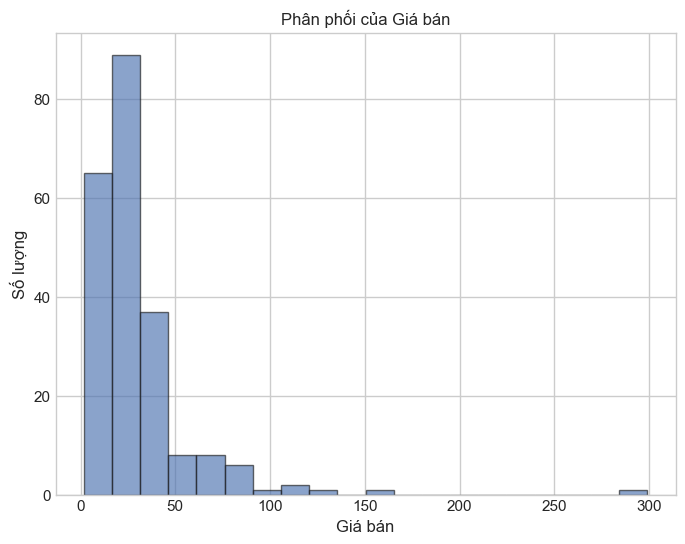

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['giá_bán'], bins=20, edgecolor='k', alpha=0.65)
plt.xlabel('Giá bán')
plt.ylabel('Số lượng')
plt.title('Phân phối của Giá bán')
plt.show()

Nhận xét: Xe được bán chủ yếu ở giá thấp (khoảng từ 0 đến 50), và số lượng giảm dần khi giá tăng lên. 

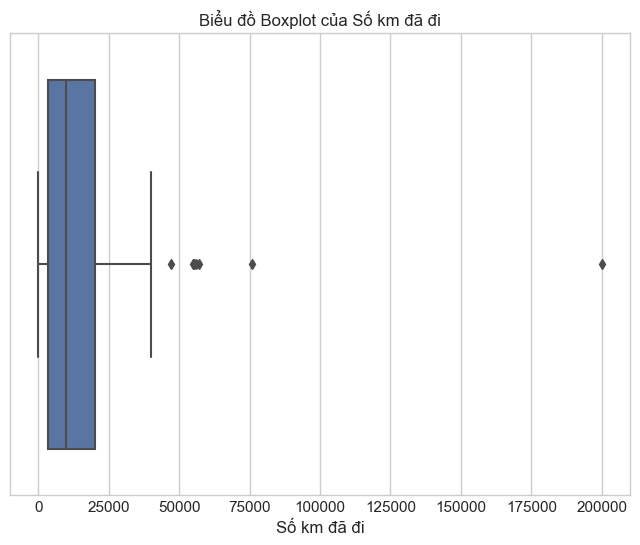

In [33]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='số_km_đã_đi', data=df, orient='vertical')
plt.xlabel('Số km đã đi')
plt.title('Biểu đồ Boxplot của Số km đã đi')
plt.show()

Nhận xét: Phần lớn các xe máy đã đi có số kilomet nằm trong khoảng thấp (từ 0 đến khoảng 50.000 km).
Trung vị nằm gần phân vị thứ nhất hơn là phân vị thứ ba, cho thấy rằng dữ liệu có xu hướng lệch về phía giá trị thấp.Có một số xe máy đã đi một lượng kilomet rất cao, được biểu thị bằng các ngoại lệ trên biểu đồ.

# 3. EDA và Visualization